# Question 1
Using the equation BMI = kg/m2 write an R program to calculate a person’s BMI. You should define two variables: a person’s height (cm) and weight (lbs). Then put the values in the equation and calculate the BMI.

(Hint: 100 cm = 1 meter and 1 kg = 2.2 lb)

In [ ]:
height <- as.numeric(readline('Enter height in cm: '))
weight <- as.numeric(readline('Enter weight in lbs: '))

height_m <- height/100
weight_kg <- weight/2.2

bmi <- weight_kg / (height_m^2)
bmi

Enter height in cm: 160
Enter weight in lbs: 128


[1] 22.72727

# Question 2
Write an R program to print out the multiplication tables of 11 to 20 once

In [ ]:
multiplication_table <- matrix(NA, nrow=10, ncol=10) # initialize a 10x10 matrix filled with NA

for (i in 1:10) {
  for (j in 1:10) {
    multiplication_table[i,j] <- i*(j+10)
  }
}

print(multiplication_table)

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
 [1,]   11   12   13   14   15   16   17   18   19    20
 [2,]   22   24   26   28   30   32   34   36   38    40
 [3,]   33   36   39   42   45   48   51   54   57    60
 [4,]   44   48   52   56   60   64   68   72   76    80
 [5,]   55   60   65   70   75   80   85   90   95   100
 [6,]   66   72   78   84   90   96  102  108  114   120
 [7,]   77   84   91   98  105  112  119  126  133   140
 [8,]   88   96  104  112  120  128  136  144  152   160
 [9,]   99  108  117  126  135  144  153  162  171   180
[10,]  110  120  130  140  150  160  170  180  190   200


## Question 3
1. Create a text file from the following text of a grocery receipt from a store:
2. Write an R program to read the .txt file
3. Find out the total grocery bill
4. Find the average price of one fruit bought from the store
5. Find the cheapest and most expensive fruit from their unit price

In [4]:
# read the file
receipt <- read.table("Question 3.txt", sep=",", header=TRUE)
receipt

fruit,unit,price
<chr>,<int>,<dbl>
mango,3,4.00
banana,7,4.50
watermelon,1,6.50
pineapple,2,6.00
honeydew,1,5.25
strawberry,20,6.00
avocado,4,12.00
apple,4,2.00


In [5]:
# total grocery bill
total_bill <- sum(receipt$price)
total_bill

[1] 46.25

In [7]:
# average price of one fruit
receipt$unit_price <- round((receipt$price / receipt$unit), 2)
average_price <- mean(receipt$unit_price)
average_price

[1] 2.565

In [ ]:
# cheapest fruit
min_price_index <- which.min(receipt$unit_price)
receipt$fruit[min_price_index]

# most expensive fruit
max_price_index <- which.max(receipt$unit_price)
receipt$fruit[max_price_index]

[1] "strawberry"

[1] "watermelon"

# Question 4
1. Identify the day with the highest total sales. Display the date and total sales amount
2. Determine the product category that generated the highest sales on average per day.

In [1]:
# read the file
sales_data <- read.table("Question 4.txt", sep=",", header=TRUE)
sales_data

Date,Product,Sales
<chr>,<chr>,<int>
2023-01-0,A,120
2023-01-07,B,85
2023-01-08,A,150
2023-01-10,C,60
2023-01-12,B,95
2023-02-02,A,130
2023-02-05,B,75
2023-02-10,C,55
2023-02-15,A,110


In [2]:
# Identify the day with the highest total sales.
highest_sales_index <- which.max(sales_data$Sales)
highest_sales_date <- sales_data$Date[highest_sales_index]
highest_sale <- sales_data$Sales[highest_sales_index]
cat('Date:', highest_sales_date, '\tTotal Sales:', highest_sale)

Date: 2023-01-08 	Total Sales: 150

In [3]:
# Determine the product category that generated the highest sales on average per day.

# Group total sales by product category and date
sales_by_category <- aggregate(Sales ~ Date + Product, data = sales_data, sum)

# Calculate average daily sales by product category
average_sales_by_category <- aggregate(Sales ~ Product, data = sales_by_category, mean)

# Identify product category with highest average sales
highest_avg_sales_index <- which.max(average_sales_by_category$Sales)
highest_avg_sales_category <- average_sales_by_category[highest_avg_sales_index, ]

# Print the product category with the highest average sales and the average sales amount
cat("Product category with the highest average sales:", highest_avg_sales_category$Product, "\n")
cat("Average Sales Amount:", highest_avg_sales_category$Sales, "\n")

Product category with the highest average sales:  A 
Average Sales Amount: 127.5 


# Question 5
Write an R program that takes a person’s BMI value as input and, running through a function, prints out if that person is underweight, normal weight, or overweight based on their BMI.

(Hint: BMI < 18.5, Underweight, 18.5 <BMI < 25, Normal weight, BMI > 25, Overweight)

In [ ]:
BMI_classification <- function(BMI) {
  if (BMI < 18.5) {
    return ('Underweight')
  }
  else if (BMI >= 18.5 && BMI < 25 ) {
    return ('Normal Weight')
  }
  else {
    return ('Overweight')
  }
}

BMI_classification(as.numeric(readline('Enter BMI: ')))

Enter BMI: 50


[1] "Overweight"

# Question 6
Using the following three matrices,

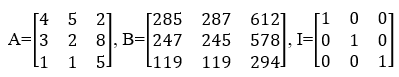

write an R program that calculates and proves that A^3 – B = I

In [8]:
matrix_proof <- function(x, y, z) {
  x_3 <- x %*% x %*% x
  condition <- ((x_3 - y) == z)
    return(all(condition))
}

A <- matrix(c(4,5,2,3,2,8,1,1,5), nrow=3, ncol=3, byrow=TRUE)
B <- matrix(c(285,287,612,247,245,578,119,119,294), nrow=3, ncol=3, byrow=TRUE)
I <- matrix(c(1,0,0,0,1,0,0,0,1), nrow=3, ncol=3, byrow=TRUE)
matrix_proof(A, B, I)

[1] TRUE

# Question 7
1. Download 563-ws-training.xmlfile
2. Plot the glucose values in the form of a basic line chart
3. Use ggplot2 and create a line and a histogram for the glucose data

In [9]:
install.packages('XML')
library(XML)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [10]:
# get file
xmlFile <- xmlParse("563-ws-training.xml")

# getting <event...> Nodes from the XML using XPath
events <- getNodeSet(xmlFile, "//patient/glucose_level/event")

# extracting the value from event tag and converting it into numeric
glucoseVals <- sapply(events, function(x){as.numeric(xmlAttrs(x)[["value"]])})

# extracting the time stamps in the correct format
glucoseTimes <- sapply(events, function(x){as.POSIXct(xmlAttrs(x)[["ts"]], format="%d-%m-%Y %H:%M:%S")})  # ts is where the timestamps are located

# make it into printable time using as.POSIXct()
glucoseTimes <- as.POSIXct(glucoseTimes, origin = "1970-01-01")


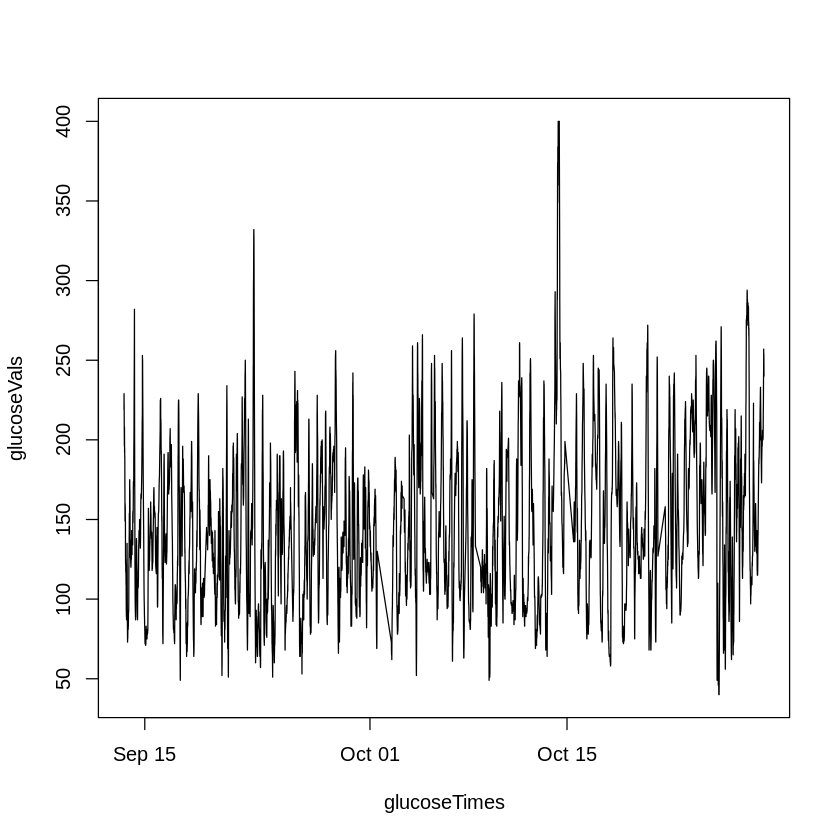

In [ ]:
# plot glucose values in the form of a basic line chart
plot(glucoseTimes, glucoseVals, type='l')

In [ ]:
library(ggplot2)

# put information into a dataframe
glucoseData <- data.frame(glucoseTimes=glucoseTimes, glucoseVals=glucoseVals)

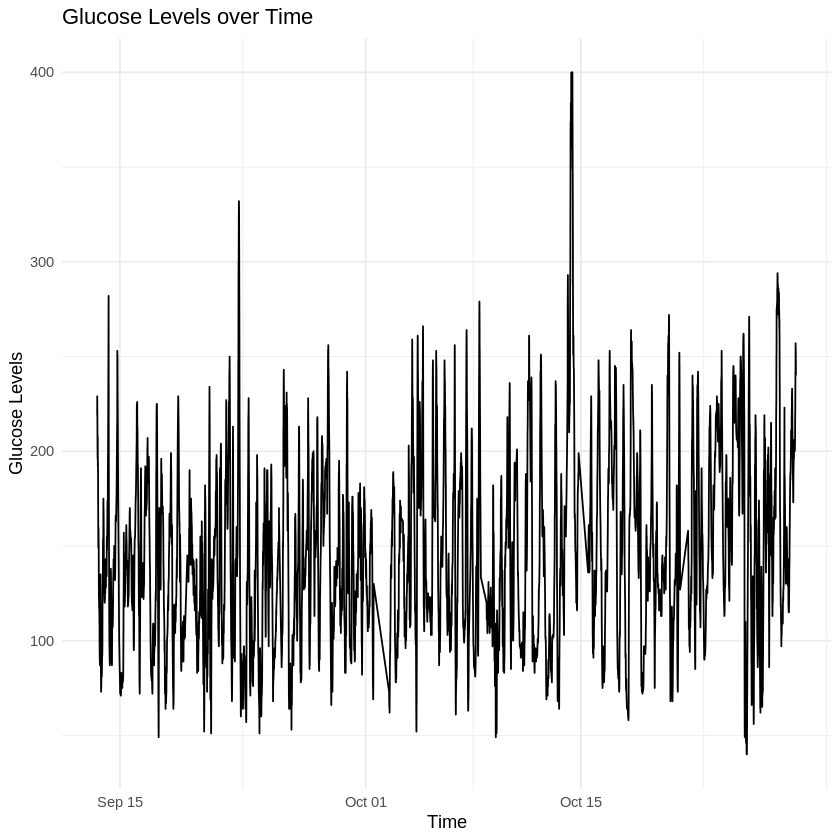

In [ ]:
# Using ggplot to create line chart
ggplot(glucoseData, aes(x=glucoseTimes, y=glucoseVals)) + geom_line() +
  labs(x = 'Time', y = 'Glucose Levels', title='Glucose Levels over Time') +
  theme_minimal()

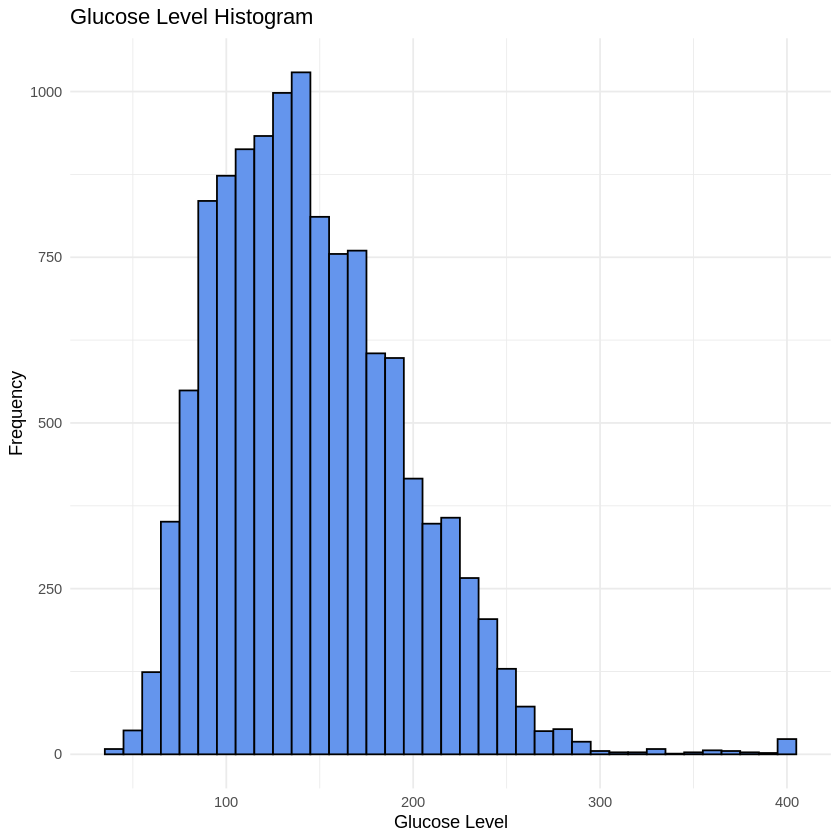

In [ ]:
# Using ggplot to create histogram
ggplot(glucoseData, aes(x = glucoseVals)) +
  geom_histogram(binwidth = 10, fill = "cornflowerblue", color = "black") +
  labs(x = "Glucose Level", y = "Frequency", title = "Glucose Level Histogram") +
  theme_minimal()